Use this code if you want to use dataset from tensorflow

Number of training images: 1027
Number of testing images: 256
Epoch 1/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 12s 283ms/step - accuracy: 0.6808 - loss: 0.6106 - val_accuracy: 0.8320 - val_loss: 0.6584
Epoch 2/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 262ms/step - accuracy: 0.9517 - loss: 0.1239 - val_accuracy: 0.8477 - val_loss: 1.0916
Epoch 3/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 265ms/step - accuracy: 0.9958 - loss: 0.0261 - val_accuracy: 0.8477 - val_loss: 1.2183
Epoch 4/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 289ms/step - accuracy: 0.9970 - loss: 0.0135 - val_accuracy: 0.8203 - val_loss: 1.7018
Epoch 5/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 279ms/step - accuracy: 0.9927 - loss: 0.0225 - val_accuracy: 0.8242 - val_loss: 2.2491
Epoch 1/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 12s 299ms/step - accuracy: 0.6325 - loss: 0.6088 - val_accuracy: 0.8633 - val_loss: 0.2739
Epoch 2/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 272ms/step - accuracy: 0.8535 - loss: 0.3592 - val_accuracy: 0.7578 - val_loss: 0.5623
Epoch 3/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 273ms/

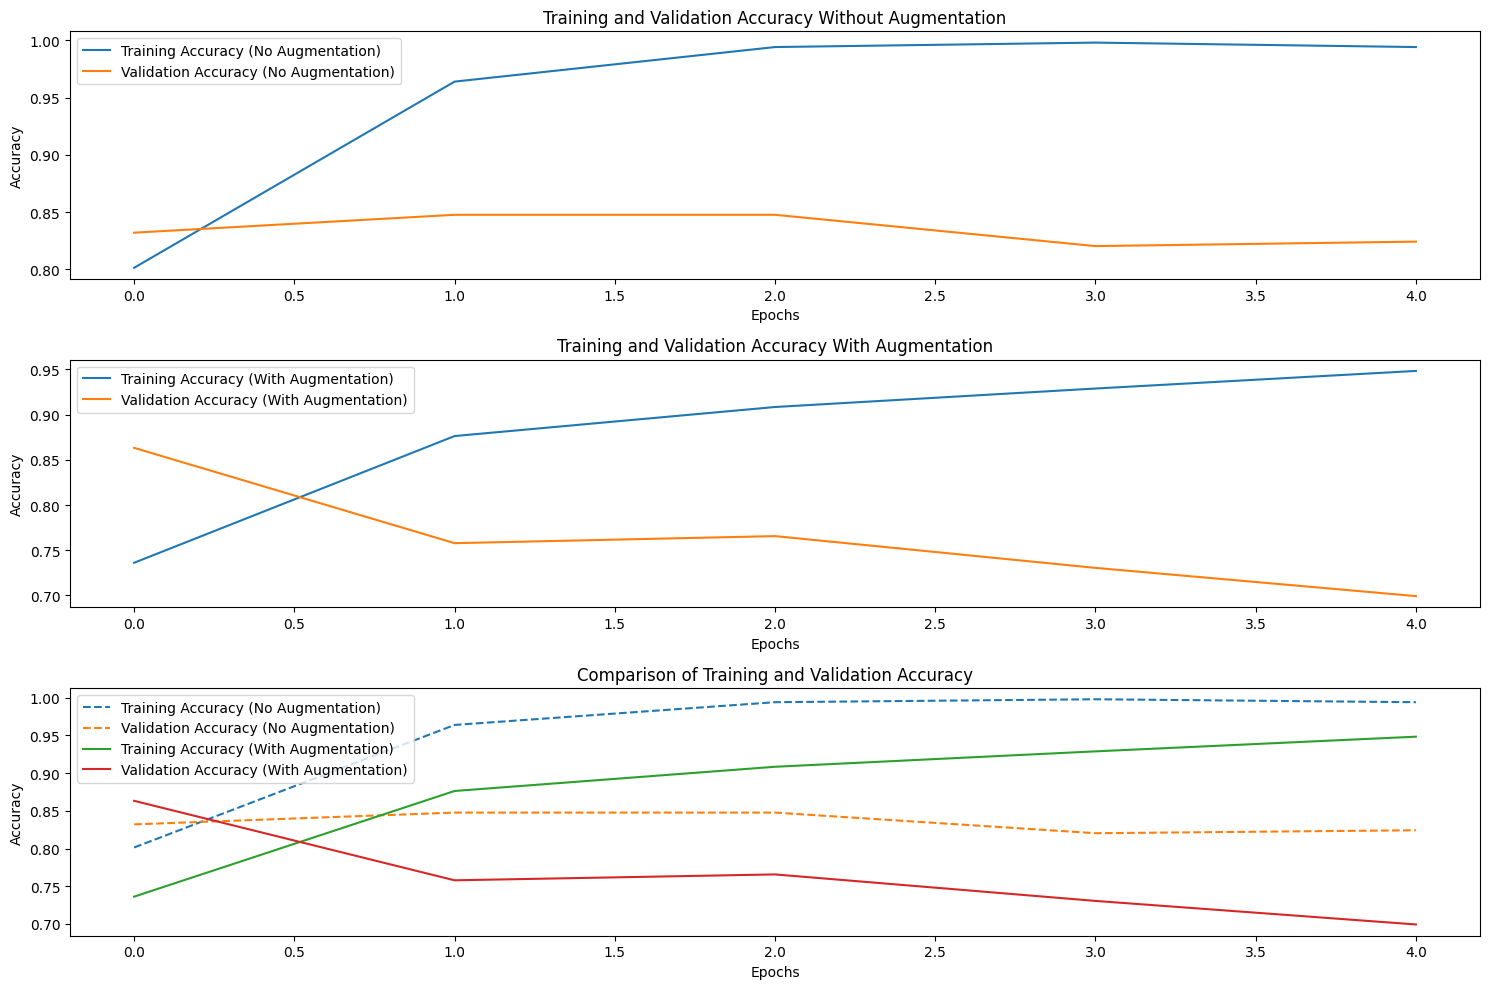

In [6]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models

# a) Load the dataset
(ds_train, ds_test), ds_info = tfds.load('horses_or_humans', split=['train', 'test'], with_info=True, as_supervised=True)

# b) Show the number of training and testing images
train_size = ds_info.splits['train'].num_examples
test_size = ds_info.splits['test'].num_examples
print(f"Number of training images: {train_size}")
print(f"Number of testing images: {test_size}")

# c) Define image augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomContrast(0.2)
])

# Prepare dataset with and without augmentation
def prepare(ds, batch_size=32, augment=False):
    ds = ds.map(lambda x, y: (tf.image.resize(x, (128, 128)), y), num_parallel_calls=tf.data.AUTOTUNE)
    ds = ds.batch(batch_size)
    if augment:
        ds = ds.map(lambda x, y: (data_augmentation(x, training=True), y), num_parallel_calls=tf.data.AUTOTUNE)
    return ds.prefetch(tf.data.AUTOTUNE)

train_ds = prepare(ds_train, augment=False)
train_ds_augmented = prepare(ds_train, augment=True)
test_ds = prepare(ds_test)

# d) Build CNN model
def create_cnn_model():
    model = models.Sequential([
        layers.Rescaling(1./255, input_shape=(128, 128, 3)),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Instantiate models
model_no_aug = create_cnn_model()
model_aug = create_cnn_model()

# e) Train model without augmentation
history_no_aug = model_no_aug.fit(train_ds, epochs=5, validation_data=test_ds)

# f) Train model with augmentation
history_aug = model_aug.fit(train_ds_augmented, epochs=5, validation_data=test_ds)

# g) Plotting results
plt.figure(figsize=(15, 10))

# 1. Plot accuracy for training without augmentation
plt.subplot(3, 1, 1)
plt.plot(history_no_aug.history['accuracy'], label='Training Accuracy (No Augmentation)')
plt.plot(history_no_aug.history['val_accuracy'], label='Validation Accuracy (No Augmentation)')
plt.title("Training and Validation Accuracy Without Augmentation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# 2. Plot accuracy for training with augmentation
plt.subplot(3, 1, 2)
plt.plot(history_aug.history['accuracy'], label='Training Accuracy (With Augmentation)')
plt.plot(history_aug.history['val_accuracy'], label='Validation Accuracy (With Augmentation)')
plt.title("Training and Validation Accuracy With Augmentation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# 3. Plot comparison of both training approaches
plt.subplot(3, 1, 3)
plt.plot(history_no_aug.history['accuracy'], label='Training Accuracy (No Augmentation)', linestyle='--')
plt.plot(history_no_aug.history['val_accuracy'], label='Validation Accuracy (No Augmentation)', linestyle='--')
plt.plot(history_aug.history['accuracy'], label='Training Accuracy (With Augmentation)')
plt.plot(history_aug.history['val_accuracy'], label='Validation Accuracy (With Augmentation)')
plt.title("Comparison of Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()


Faster RCNN

Number of training images: 1027
Number of testing images: 256
Epoch 1/2
17/17 ━━━━━━━━━━━━━━━━━━━━ 147s 6s/step - accuracy: 0.8991 - loss: 0.1898 - val_accuracy: 0.4805 - val_loss: 5.9024
Epoch 2/2
17/17 ━━━━━━━━━━━━━━━━━━━━ 108s 6s/step - accuracy: 0.9936 - loss: 0.0379 - val_accuracy: 0.5195 - val_loss: 8.9742
Training Accuracy: 99.22%
Validation Accuracy: 51.95%


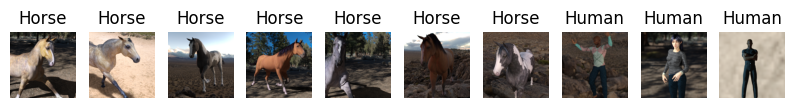

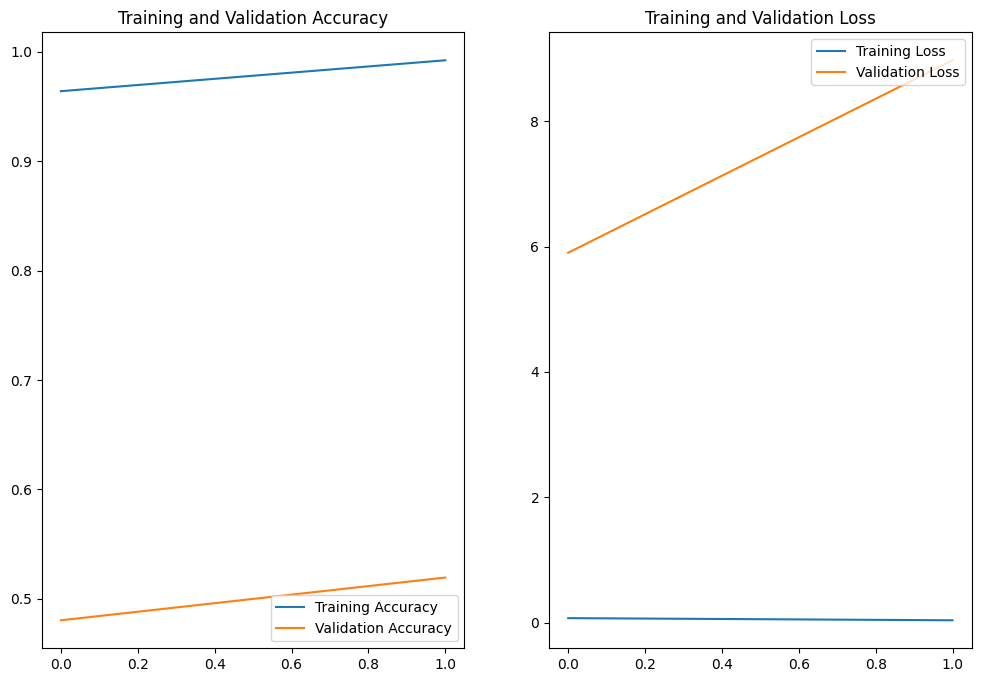

In [17]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset (Horses or Humans)
train_ds, test_ds = tfds.load('horses_or_humans', split=['train', 'test'], as_supervised=True)

# Step 1: Show number of images in train and test datasets
num_train = tf.data.experimental.cardinality(train_ds).numpy()
num_test = tf.data.experimental.cardinality(test_ds).numpy()
print(f"Number of training images: {num_train}")
print(f"Number of testing images: {num_test}")

# Step 2: Plot some images
def plot_samples(dataset, num_samples=10):
    plt.figure(figsize=(10, 10))
    for i, (image, label) in enumerate(dataset.take(num_samples)):
        ax = plt.subplot(1, num_samples, i + 1)
        plt.imshow(image.numpy().astype("uint8"))
        plt.title("Human" if label == 1 else "Horse")
        plt.axis("off")

plot_samples(train_ds)

# Step 3 (Updated): Image Augmentation (contrast, flipping, rotation, and resizing)
def augment(image, label):
    image = tf.image.resize(image, (224, 224))  # Resize to match MobileNetV2 input size
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_contrast(image, 0.2, 0.5)
    image = tf.image.rot90(image)
    return image, label

augmented_train_ds = train_ds.map(augment, num_parallel_calls=tf.data.AUTOTUNE)
test_ds = test_ds.map(lambda image, label: (tf.image.resize(image, (224, 224)), label), 
                      num_parallel_calls=tf.data.AUTOTUNE)


# Step 4: Normalizing the images
def normalize(image, label):
    image = tf.cast(image, tf.float32) / 255.0  # normalize to [0,1]
    return image, label

augmented_train_ds = augmented_train_ds.map(normalize, num_parallel_calls=tf.data.AUTOTUNE)
test_ds = test_ds.map(normalize, num_parallel_calls=tf.data.AUTOTUNE)

# Step 5: Prepare datasets for training
batch_size = 64
augmented_train_ds = augmented_train_ds.cache().shuffle(1000).batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)

# Step 6: Define a simple Faster R-CNN model (using a pre-trained base)
base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3),
                                               include_top=False,
                                               weights="imagenet")

# Faster R-CNN specific layers
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(2, activation='softmax')
])

# Step 7: Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 8: Train the model
epochs = 2
history = model.fit(augmented_train_ds, validation_data=test_ds, epochs=epochs)

# Step 9: Show training and testing accuracy
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]
print(f"Training Accuracy: {train_acc * 100:.2f}%")
print(f"Validation Accuracy: {val_acc * 100:.2f}%")

# Plot accuracy and loss
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(12, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

plot_history(history)


use this code if you download the human-horse dataset from internet

Found 1027 files belonging to 2 classes.
Using 822 files for training.
Found 1027 files belonging to 2 classes.
Using 205 files for validation.
Number of training images: 832
Number of validation images: 224


C:\Users\aasis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 14s 383ms/step - accuracy: 0.6608 - loss: 0.6738 - val_accuracy: 0.9268 - val_loss: 0.2075
Epoch 2/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 9s 328ms/step - accuracy: 0.9356 - loss: 0.1518 - val_accuracy: 0.9707 - val_loss: 0.0787
Epoch 3/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 9s 324ms/step - accuracy: 0.9816 - loss: 0.0419 - val_accuracy: 0.9805 - val_loss: 0.0393
Epoch 4/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 316ms/step - accuracy: 0.9953 - loss: 0.0177 - val_accuracy: 0.9707 - val_loss: 0.0721
Epoch 5/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 295ms/step - accuracy: 0.9753 - loss: 0.0639 - val_accuracy: 0.9902 - val_loss: 0.0303
Epoch 1/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 11s 309ms/step - accuracy: 0.5936 - loss: 0.7656 - val_accuracy: 0.9073 - val_loss: 0.2975
Epoch 2/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 9s 331ms/step - accuracy: 0.8261 - loss: 0.3726 - val_accuracy: 0.9512 - val_loss: 0.1792
Epoch 3/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 303ms/step - accuracy: 0.9097 - loss: 0.2265 - val_accuracy: 0.9415 -

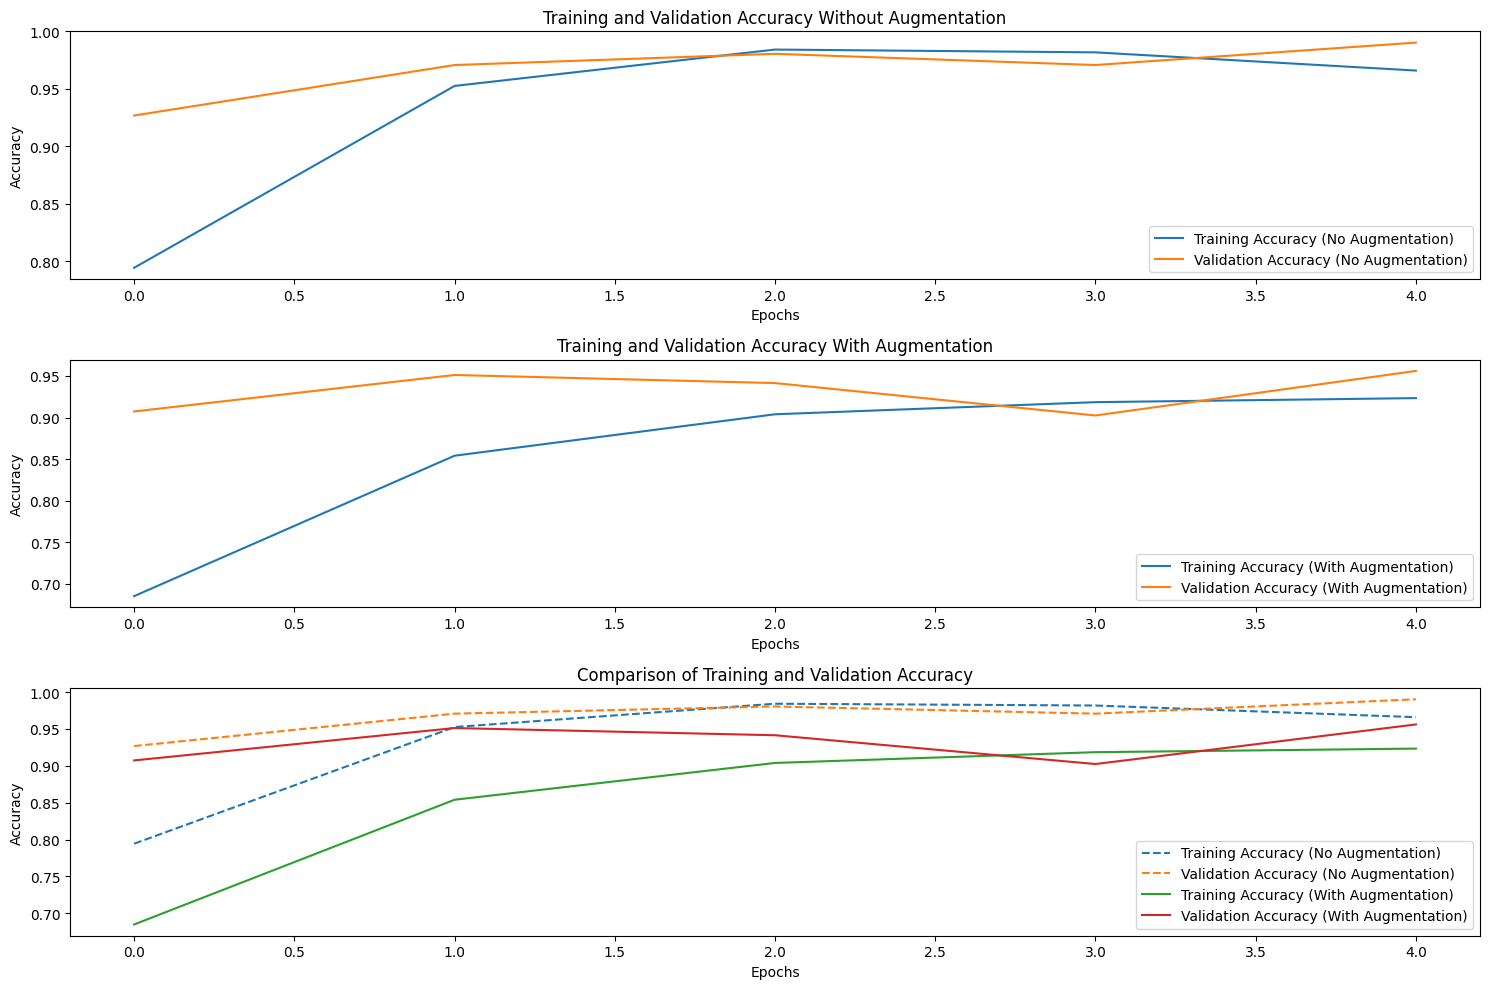

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os
import pathlib

# Path to your dataset directory
data_dir = pathlib.Path(r"path")

# a) Load the dataset using image_dataset_from_directory
batch_size = 32
img_height = 128
img_width = 128

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    label_mode="binary",  # Binary labels for horse and human
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=True,
    validation_split=0.2,  # Reserve 20% for validation
    subset="training",
    seed=123
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    label_mode="binary",
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=True,
    validation_split=0.2,
    subset="validation",
    seed=123
)

# Show the number of images in each dataset
train_size = tf.data.experimental.cardinality(train_ds).numpy()
val_size = tf.data.experimental.cardinality(val_ds).numpy()
print(f"Number of training images: {train_size * batch_size}")
print(f"Number of validation images: {val_size * batch_size}")

# b) Define data augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomContrast(0.2)
])

# Prepare dataset with and without augmentation
def prepare(ds, augment=False):
    if augment:
        ds = ds.map(lambda x, y: (data_augmentation(x, training=True), y), num_parallel_calls=tf.data.AUTOTUNE)
    return ds.prefetch(tf.data.AUTOTUNE)

train_ds = prepare(train_ds, augment=False)
train_ds_augmented = prepare(train_ds, augment=True)
val_ds = prepare(val_ds)

# c) Build CNN model
def create_cnn_model():
    model = models.Sequential([
        layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Instantiate models
model_no_aug = create_cnn_model()
model_aug = create_cnn_model()

# d) Train model without augmentation
history_no_aug = model_no_aug.fit(train_ds, epochs=5, validation_data=val_ds)

# e) Train model with augmentation
history_aug = model_aug.fit(train_ds_augmented, epochs=5, validation_data=val_ds)

# f) Plotting results
plt.figure(figsize=(15, 10))

# 1. Plot accuracy for training without augmentation
plt.subplot(3, 1, 1)
plt.plot(history_no_aug.history['accuracy'], label='Training Accuracy (No Augmentation)')
plt.plot(history_no_aug.history['val_accuracy'], label='Validation Accuracy (No Augmentation)')
plt.title("Training and Validation Accuracy Without Augmentation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# 2. Plot accuracy for training with augmentation
plt.subplot(3, 1, 2)
plt.plot(history_aug.history['accuracy'], label='Training Accuracy (With Augmentation)')
plt.plot(history_aug.history['val_accuracy'], label='Validation Accuracy (With Augmentation)')
plt.title("Training and Validation Accuracy With Augmentation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# 3. Plot comparison of both training approaches
plt.subplot(3, 1, 3)
plt.plot(history_no_aug.history['accuracy'], label='Training Accuracy (No Augmentation)', linestyle='--')
plt.plot(history_no_aug.history['val_accuracy'], label='Validation Accuracy (No Augmentation)', linestyle='--')
plt.plot(history_aug.history['accuracy'], label='Training Accuracy (With Augmentation)')
plt.plot(history_aug.history['val_accuracy'], label='Validation Accuracy (With Augmentation)')
plt.title("Comparison of Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()
